## Import all Libraries

In [115]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gather Training and Testing Data

In [153]:
del df
# Read in dataframe
df = pd.read_csv('fbdh1.csv')

In [154]:
df['dFlow'] = df['Flow'].diff()

In [147]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,dFlow
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,NaN
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0.46
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0.69
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0.37
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0.66


In [155]:
movingAvgFlow = df['Flow'].rolling(window = 5).mean()
movingAvgFlowRate = df['dFlow'].rolling(window = 5).mean()

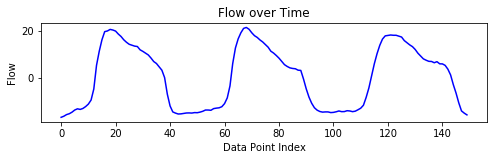

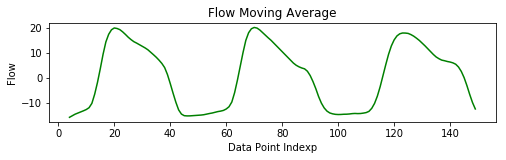

In [149]:
fig = plt.figure(figsize = (8, 4))
plt.subplot(2, 1, 1)
plt.plot(range(0, 150), df['Flow'][0:150], 'b')
plt.xlabel('Data Point Index')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (8, 4))
plt.subplot(2, 1, 2)
plt.plot(range(0, 150), movingAvgFlow[0:150], 'g')
plt.xlabel('Data Point Indexp')
plt.ylabel('Flow')
plt.title('Flow Moving Average')
plt.show()

In [112]:
def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

In [156]:
# Use a label fix function to assign classifications or ground truth to Flow thresholds
def classify(slope):
    if slope > 1:
        return 0
    elif slope < -0.2:
        return 1
    else:
        return 2

df['Class'] = movingAvgFlowRate.apply(classify)

In [151]:
df.head(15)

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,dFlow,Class
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,NaN,2
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0.46,2
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0.69,2
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0.37,2
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0.66,2
5,-13.60,470.28,-19.14,203.05,0.59,75.51,25.58,31.30,3.25,0.91,2
6,-13.09,534.51,-24.69,228.23,-0.03,74.81,15.73,30.35,2.24,0.51,2
7,-13.34,613.58,-27.92,258.63,-0.42,74.71,6.98,29.63,1.20,-0.25,2
8,-12.94,686.97,-20.14,286.70,-0.10,74.35,2.13,28.96,0.22,0.40,2
9,-12.14,760.08,11.86,313.89,2.41,74.36,7.30,28.48,0.44,0.80,2


## EDA

time = range(0, 6664)
flow = df['Flow']
pressure = df['P1']
distance = df['D1']

fig = plt.figure(figsize = (16, 15))
plt.subplot(3,1,1)
plt.plot(time, flow, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (16, 15))
plt.subplot(3,1,2)
plt.plot(time, pressure, 'b')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.show()

fig = plt.figure(figsize = (16, 15))
plt.subplot(3,1,2)
plt.plot(time, distance, 'b')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance over Time')
plt.show()

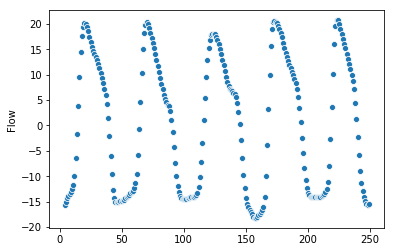

In [134]:
sns.scatterplot(x = range(0, 250), y = movingAvgFlow[0:250])

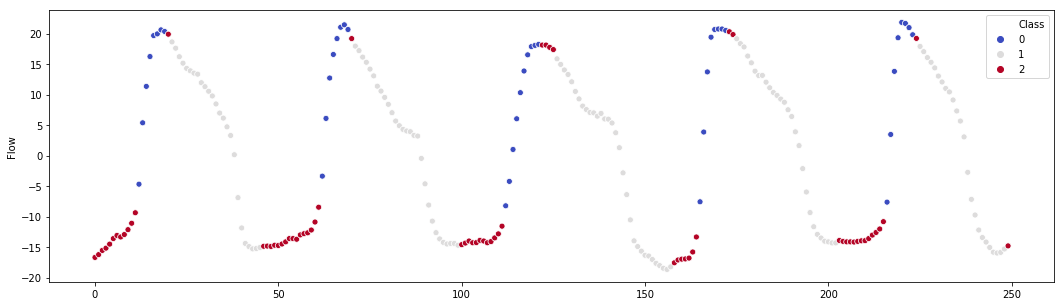

In [157]:
fig = plt.figure(figsize = (18, 5))
sns.scatterplot(y = df['Flow'][0:250], x = range(0, 250), hue = df['Class'][0:250], palette = 'coolwarm')

In [11]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,0
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0


In [18]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,0
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0


In [31]:
df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

/Users/mikefurr/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


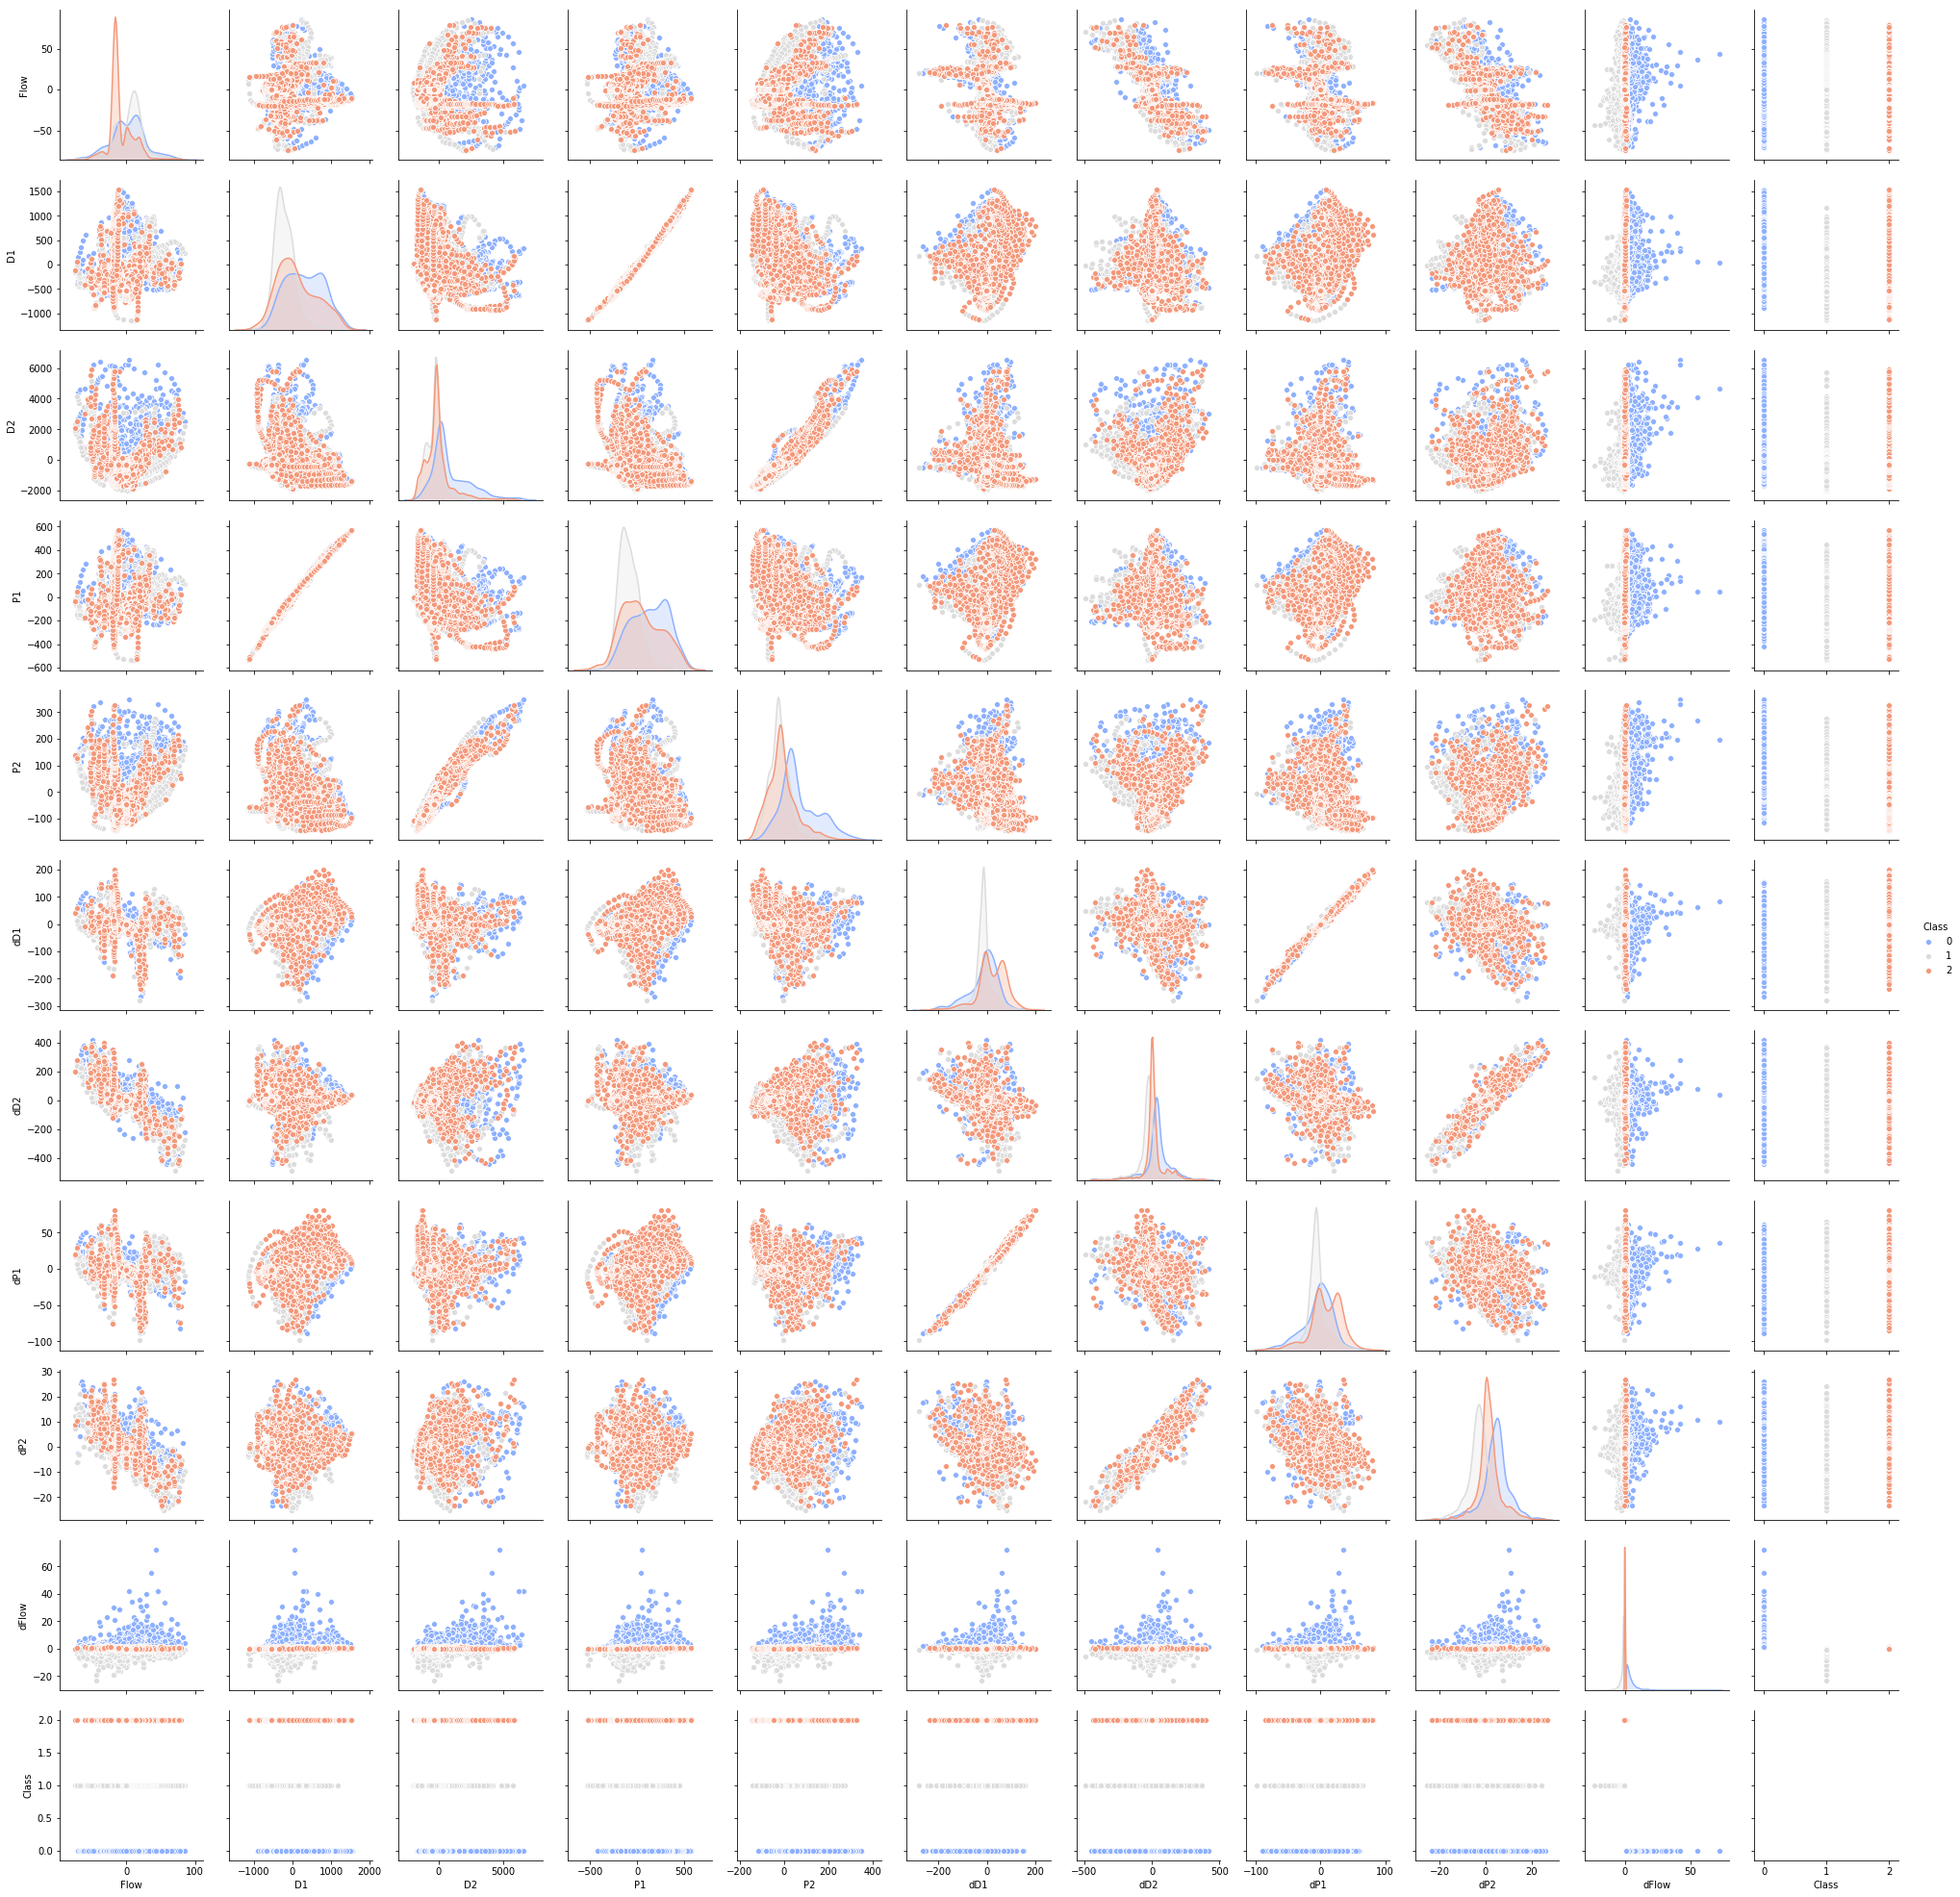

In [104]:
sns.pairplot(df, hue = 'Class', palette = 'coolwarm')

## Scale and Create Feature Matrix

In [165]:
# Create the Feature Matrix and Scale Features
X = df.drop('Flow', axis = 1)
X.drop('Class', axis = 1, inplace = True)
X.drop('dFlow', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

## Develop Keras Model

### Ideal Parameters

{'Dense_1': 150, 'Dense_2': 50, 'Dropout_1': 0.3, 'Dropout_2': 0.4, 'epochs': 50}
0.9060891938250428

In [168]:
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

In [169]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [170]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                7550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [171]:
EPOCHS = 50

model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/50
4664/4664 [==============================] - 0s 47us/sample - loss: 0.7054 - acc: 0.7464
Epoch 2/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.5923 - acc: 0.7875
Epoch 3/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.5736 - acc: 0.7933
Epoch 4/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.5563 - acc: 0.8012
Epoch 5/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.5384 - acc: 0.8055
Epoch 6/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.5352 - acc: 0.8021
Epoch 7/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.5287 - acc: 0.8045
Epoch 8/50
4664/4664 [==============================] - 0s 34us/sample - loss: 0.5278 - acc: 0.8023
Epoch 9/50
4664/4664 [==============================] - 0s 33us/sample - loss: 0.5226 - acc: 0.8025
Epoch 10/50
4664/4664 [==============================] - 0s 31us/sample - loss: 0.5136 - acc: 0.8077

In [172]:
# Scoring the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2000/2000 [==============================] - 0s 28us/sample - loss: 0.4219 - acc: 0.8380
Test accuracy: 0.838
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       380
           1       0.85      0.95      0.90      1049
           2       0.81      0.65      0.72       571

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.83      0.80      0.82      2000
weighted avg       0.84      0.84      0.83      2000



## Perform Grid Search to Tune Parameters

In [388]:
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
    classifier.add(keras.layers.Dense(3, activation = tf.nn.sigmoid))
    classifier.compile(optimizer = optimizer, 
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    return classifier

classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25, 50], 
             'epochs': [500, 700], 
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters, 
                          scoring = 'accuracy', 
                          cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_acc = grid_search.best_score_

print(best_parameters)
print(best_acc)

## Test Model on New Data

In [178]:
# Read in dataframe
test = pd.read_csv('test_data_2.csv')
test['dFlow'] = test['Flow'].diff()
test['Class'] = test['dFlow'].apply(classify)

In [179]:
test.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,dFlow,Class
0,-18.06,108.35,-145.16,84.37,-16.80,362.56,12.29,80.06,1.74,NaN,2
1,-18.06,455.13,-139.07,148.93,-15.90,354.47,8.35,73.30,1.30,0.00,2
2,-18.23,761.09,-144.06,202.42,-15.86,342.88,3.15,66.64,0.78,-0.17,2
3,-18.94,1010.37,-161.04,243.71,-17.84,322.09,-3.10,59.18,0.03,-0.71,1
4,-19.26,1350.27,-172.37,297.91,-19.24,313.99,-8.30,54.45,-0.74,-0.32,1


In [182]:
# Create the Feature Matrix and Scale Features
X_1 = test.drop('Flow', axis = 1)
X_1.drop('Class', axis = 1, inplace = True)
X_1.drop('dFlow', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

In [183]:
loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

test_predictions = model.predict(X_1)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(y_1, final_pred_test))

5019/5019 [==============================] - 0s 13us/sample - loss: 0.8385 - acc: 0.6802
Test accuracy: 0.6802152
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       900
           1       0.76      0.83      0.80      2584
           2       0.60      0.48      0.53      1535

   micro avg       0.68      0.68      0.68      5019
   macro avg       0.63      0.63      0.63      5019
weighted avg       0.67      0.68      0.67      5019



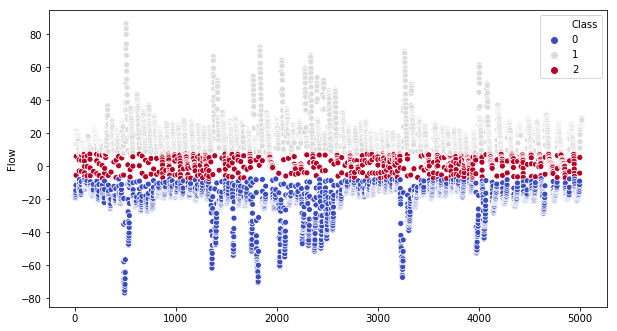

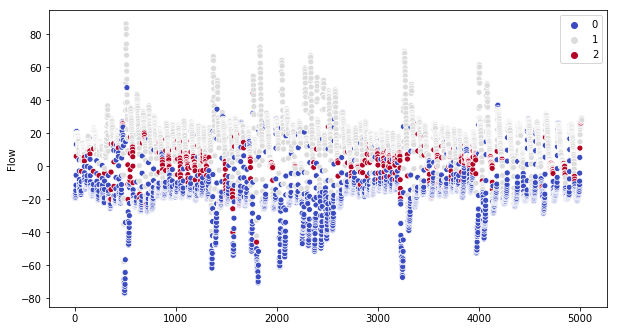

In [290]:
fig = plt.figure(figsize = (10, 12))

time_2 = range(0, 5019)

plt.subplot(2, 1, 1)
sns.scatterplot(x = time_2, y = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(x = time_2, y = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

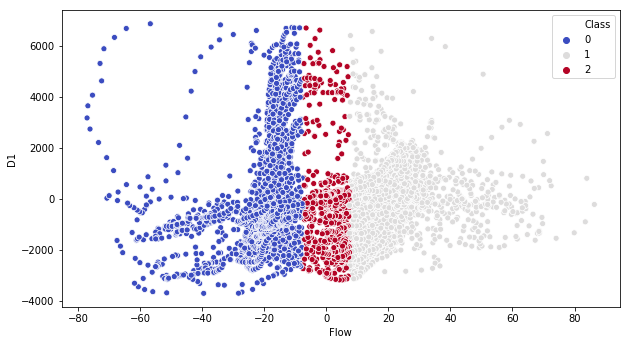

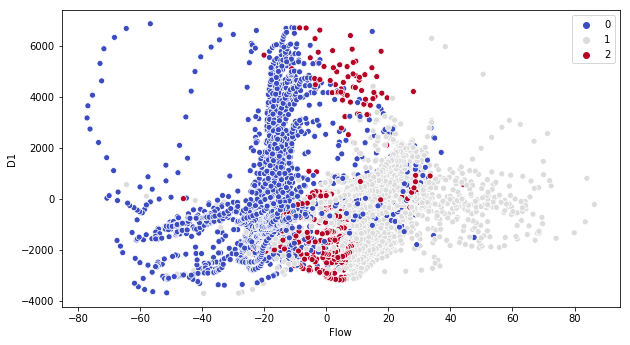

In [291]:
fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

## Save Keras File as TensorFlow Lite

In [292]:
keras_file = "model_Sept_5.h5"

In [293]:
keras.models.save_model(model, keras_file)

In [294]:
converter = tf.lite.TocoConverter.from_keras_model_file(keras_file)

In [295]:
tflite_model = converter.convert()

In [296]:
open("test_save_2.tflite", "wb").write(tflite_model)

8280